In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from load_data import *
from util import *

%matplotlib inline

In [2]:
path = '/media/clo302/3TB_RAID/data/TCGA_embedding/'
ref_path = '/media/clo302/3TB_RAID/ref/TCGA_RNASeq/'

load data

In [3]:
gemb_CN, genes, semb_CN, sids_CN = load_data(path, ['gemb_CN.csv', 'semb_CN.csv'], return_rn=True)

(20531, 50)
(9544, 50)


In [4]:
gene2idx = {g:i for i, g in enumerate(genes)}
sid2ca, ca_cats = load_sid2ca(ref_path)
gene2gid = load_gene2gid(ref_path)

len: 10245
len: 20531


## heatmap

### cancer cluster group

In [7]:
arr_centroid = [find_centroid(semb_CN, sid2ca, sids_CN, cancer=c) for c in ca_cats]
semb_centroid_df = pd.DataFrame(arr_centroid, index=ca_cats)

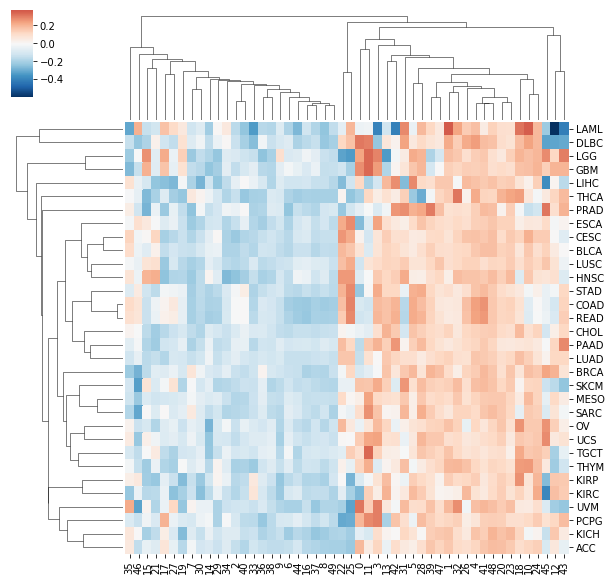

In [8]:
sns.clustermap(semb_centroid_df, xticklabels=True, yticklabels=True, 
               cmap='RdBu_r', center=0)

In [7]:
head_dims = [17,22,25]
tail_dims = [12,13,35,43,46]
head_genes = [pull_top_genes(gemb_CN, d, genes) for d in head_dims]
tail_genes = [pull_top_genes(gemb_CN, d, genes, tail=True) for d in tail_dims]
for d,g in zip(head_dims, head_genes): export_gid(path, 'gemb_CN_d%d_top100_gids.txt' % d, g, gene2gid)
for d,g in zip(tail_dims, tail_genes): export_gid(path, 'gemb_CN_d%d_bottom100_gids.txt' % d, g, gene2gid)

saving to /media/clo302/3TB_RAID/data/TCGA_embedding/gemb_CN_d17_top100_gids.txt
saved
saving to /media/clo302/3TB_RAID/data/TCGA_embedding/gemb_CN_d22_top100_gids.txt
saved
saving to /media/clo302/3TB_RAID/data/TCGA_embedding/gemb_CN_d25_top100_gids.txt
saved
saving to /media/clo302/3TB_RAID/data/TCGA_embedding/gemb_CN_d12_bottom100_gids.txt
saved
saving to /media/clo302/3TB_RAID/data/TCGA_embedding/gemb_CN_d13_bottom100_gids.txt
saved
saving to /media/clo302/3TB_RAID/data/TCGA_embedding/gemb_CN_d35_bottom100_gids.txt
saved
saving to /media/clo302/3TB_RAID/data/TCGA_embedding/gemb_CN_d43_bottom100_gids.txt
saved
saving to /media/clo302/3TB_RAID/data/TCGA_embedding/gemb_CN_d46_bottom100_gids.txt
saved


### sex: TGCT PRAD OV UCS

In [7]:
sex_ca_cats = ['LIHC', 'PRAD', 'OV', 'CESC']
sex_ca_arr_centroid = [find_centroid(semb_CN, sid2ca, sids_CN, cancer=c) for c in sex_ca_cats]
sex_ca_semb_centroid_df = pd.DataFrame(sex_ca_arr_centroid, index=sex_ca_cats)

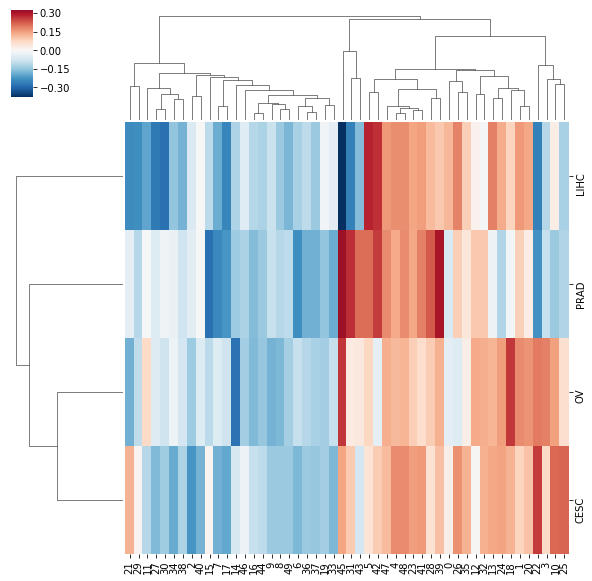

In [8]:
sns.clustermap(sex_ca_semb_centroid_df, xticklabels=True, yticklabels=True, 
               cmap='RdBu_r', center=0)

### cancer subtypes

In [5]:
lihc_semb_CN = subset_semb(semb_CN, 'LIHC', sids_CN, sid2ca)

In [39]:
lihc_semb_CN.shape

(373, 50)

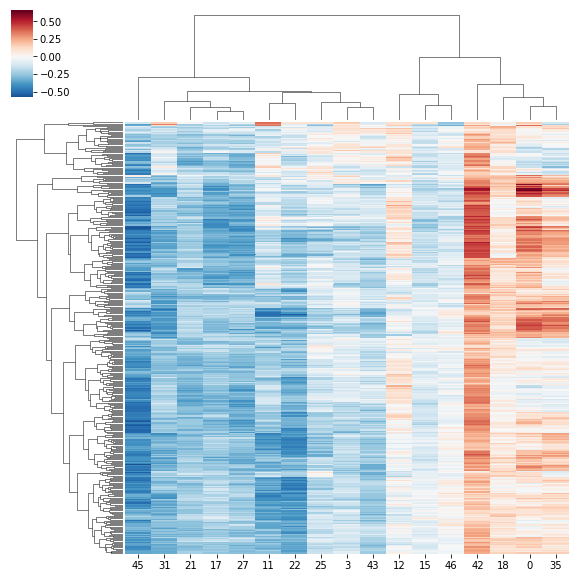

In [10]:
sns.clustermap(lihc_semb_CN, xticklabels=True, yticklabels=False, 
               cmap='RdBu_r', method='complete', center=0)

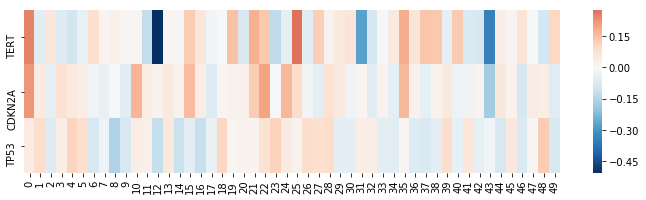

In [11]:
lihc_subtypes_genes = ['TERT', 'CDKN2A', 'TP53']
show_genes_dim(gemb_CN, lihc_subtypes_genes, gene2idx, fs=(12,3))

In [8]:
lihc_semb_CN = subset_semb(semb_CN, 'LIHC', sids_CN, sid2ca, drop_lowvar=False)

In [9]:
lihc_semb_CN_st = lihc_semb_CN.loc[:,[10,12,18]]

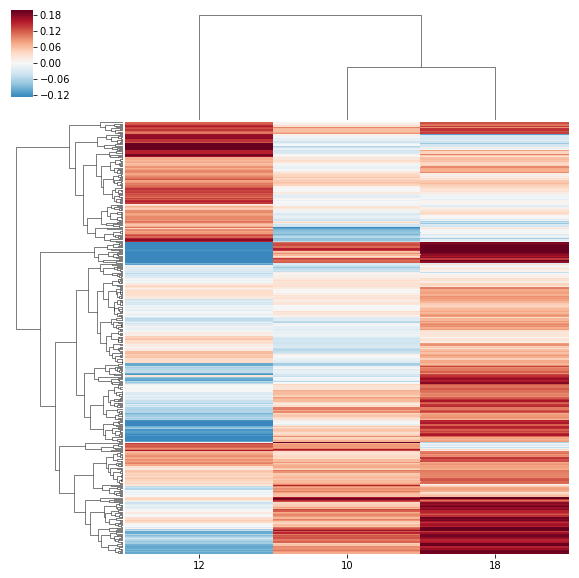

In [33]:
sns.clustermap(lihc_semb_CN_st, xticklabels=True, yticklabels=False, 
               cmap='RdBu_r', robust=True, center=0, method='complete')

In [17]:
pull_top_genes(gemb_CN, 10, genes)

Index(['ARGLU1', 'MS4A14', 'DAPP1', 'CLEC7A', 'ABCA12', 'YWHAZ', 'FTH1',
       'FSCN1', 'CD74', 'STMN1', 'STOM', 'UBC', 'DDX17', 'FTL', 'TYMP',
       'UNC13D', 'ALDOA', 'GSTM2', 'GSTP1', 'GALNT6', 'GAPDH', 'FN1', 'LY6E',
       'PLCB2', 'HLA-A', 'PKM2', 'MIAT', 'LTB4R', 'MX1', 'FGF11', 'FGD3',
       'HLA-DRA', 'PYGL', 'UHRF1', 'TAGLN2', 'RAB31', 'WSB1', 'COL11A1',
       'FCGR1C', 'FCGR1A', 'SLC4A8', 'PFKFB3', 'ATG16L2', 'CLSTN3', 'APOE',
       'TUBA1A', 'NCRNA00201', 'IFI16', 'ZNF512B', 'VCAN', 'ACAP3', 'SLC1A3',
       'INTS3', 'EVL', 'LOC254559', 'NFKBIA', 'CTSB', 'ERMN', 'YPEL3', 'KCND2',
       'ENO2', 'CNIH2', 'ENO1', 'PARP6', 'GATA3', 'CRABP2', 'B2M', 'CRIP1',
       'PABPC1L', 'ARHGDIB', 'LGALS3BP', 'LGALS1', 'ZNF655', 'TMSB10',
       'S100A9', 'TMSL3', 'GLUL', 'TNFAIP2', 'TNNT1', 'RNF213', 'SPP1',
       'LAPTM5', 'S100A16', 'TPM3', 'TPT1', 'WASH7P', 'KIFC2', 'UCP2',
       'CCDC150', 'TRIM46', 'ACTG1', 'BST2', 'ACTB', 'CAPG', 'CLU', 'RTN4',
       'BNIPL', 'ATHL1', 'DNAH

In [16]:
pull_top_genes(gemb_CN, 12, genes, tail=True)

Index(['KRT20', 'PAX5', 'CXorf65', 'TTC24', 'MYO1A', 'GFI1', 'LOC150197',
       'ZNF280B', 'LOC115110', 'IGF2BP2', 'FAM129C', 'CD19', 'C19orf71',
       'MEP1A', 'PIF1', 'ARHGAP11B', 'FCRL1', 'FCRL2', 'C10orf110', 'MGC16025',
       'SCML4', 'FCRL3', 'GSG2', 'LOC100188949', 'TREML2', 'CDCA7', 'CDX2',
       'GPA33', 'IL2RG', 'KCNV2', 'DDX12', 'PDE3B', 'PRAME', 'TERT', 'ATAD5',
       'GPR18', 'ZAP70', 'MIR17HG', 'SNHG4', 'CNR2', 'RGL4', 'C2orf48',
       'LOC100129726', 'ADAT2', 'UBASH3A', 'GAPDHS', 'ANKLE1', 'MLANA',
       'CAPN3', 'IRF4', 'HPDL', 'BAIAP2L2', 'TNFRSF13C', 'GTSE1',
       'LOC100127888', 'PMFBP1', 'LOC642846', 'KEL', 'MDN1', 'KIF14', 'CYP2W1',
       'SCARNA12', 'EOMES', 'LOC256880', 'NR1I2', 'PPARGC1B', 'FCRLA', 'ESPL1',
       'KIAA0125', 'HSF5', 'TXK', 'GPR174', 'POU4F1', 'SLCO5A1', 'ABCC2',
       'KCNH8', 'MSH5', 'PASK', 'PARP15', 'ZNF589', 'ESR2', 'COL11A2',
       'LOC100128842', 'BTLA', 'LGALS4', 'CPN1', 'LOC90834', 'C15orf42',
       'MFSD2B', 'C17orf73', 'S

In [18]:
pull_top_genes(gemb_CN, 18, genes)

Index(['RPS3', 'NCRNA00105', 'SLAIN1', 'UBXN11', 'CELF4', 'L3MBTL', 'CASC1',
       'MYH14', 'ENPP4', 'MLXIPL', 'NSUN5P2', 'AQP4', 'KSR2', 'KCNJ10',
       'DCDC2', 'UNC5CL', 'UCP2', 'E2F5', 'LOC100272228', 'KIAA1875', 'KRT8',
       'FTH1', 'EPCAM', 'KRT7', 'ACBD7', 'RASSF4', 'LOC646851', 'FER1L4',
       'BEX2', 'NCRNA00201', 'SBK1', 'PRSS50', 'PTMA', 'PDE6B', 'GOLGA8A',
       'GNAS', 'BEND7', 'MUC20', 'ENPP5', 'TMBIM6', 'C16orf79', 'GOLGA8B',
       'PLCH1', 'GOLT1A', 'GAPDH', 'RGL3', 'ZMAT1', 'DDR1', 'NSUN7', 'FOXJ1',
       'CLU', 'EIF4A2', 'FOLR1', 'ACTG1', 'SLC34A2', 'PPP1R9A', 'RPS7',
       'TMEM125', 'AGER', 'PRKX', 'TEKT2', 'LCN12', 'AMY2B', 'CLDN10', 'RSPH1',
       'STK33', 'PABPC1L', 'ABCA3', 'SERPINA1', 'C6orf26', 'RPS4X', 'SLC29A2',
       'HPN', 'C11orf9', 'ELF3', 'EEF1A1', 'RNFT2', 'MAPK15', 'KCNC3',
       'TMEM163', 'ARHGAP33', 'METTL7B', 'ATP1B1', 'SPINT2', 'MYO15B', 'ATHL1',
       'NEAT1', 'PLEKHB1', 'CLDN3', 'CLDN7', 'LRP2', 'MST1P9', 'PILRB',
       'RHPN1', '

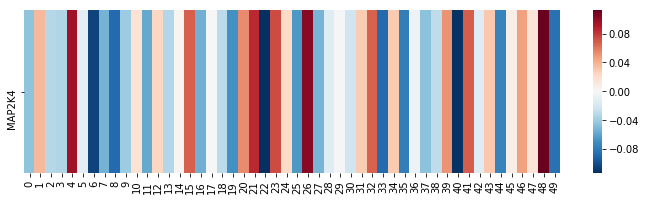

In [28]:
show_genes_dim(gemb_CN, ['MAP2K4'], gene2idx, fs=(12,3))

In [34]:
export_gid(path, 'gemb_CN_d10_top100_gids.txt', pull_top_genes(gemb_CN, 10, genes), gene2gid)

saving to /media/clo302/3TB_RAID/data/TCGA_embedding/gemb_CN_d10_top100_gids.txt
saved


In [35]:
export_gid(path, 'gemb_CN_d18_top100_gids.txt', pull_top_genes(gemb_CN, 18, genes), gene2gid)

saving to /media/clo302/3TB_RAID/data/TCGA_embedding/gemb_CN_d18_top100_gids.txt
saved


In [36]:
export_gid(path, 'gemb_CN_d10_top500_gids.txt', pull_top_genes(gemb_CN, 10, genes, n=500), gene2gid)

saving to /media/clo302/3TB_RAID/data/TCGA_embedding/gemb_CN_d10_top500_gids.txt
saved


In [37]:
export_gid(path, 'gemb_CN_d12_bottom500_gids.txt', pull_top_genes(gemb_CN, 12, genes, n=500, tail=True), gene2gid)

saving to /media/clo302/3TB_RAID/data/TCGA_embedding/gemb_CN_d12_bottom500_gids.txt
saved


In [38]:
export_gid(path, 'gemb_CN_d18_top500_gids.txt', pull_top_genes(gemb_CN, 18, genes, n=500), gene2gid)

saving to /media/clo302/3TB_RAID/data/TCGA_embedding/gemb_CN_d18_top500_gids.txt
saved
